# UJIAN AKHIR SEMESTER BIG DATA & DATA MINING
Nama : Ahmad Naufal Abiyyu

NIM : 22.11.4963

Kelas : BDDM 8

Prediksi Kepuasan Penumpang Maskapai Penerbangan Menggunakan Algoritma Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# PREPROCESSING

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Data/BDDM/FINAL UAS/airplane_satisfaction.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
# Mengecek missing value pada dataset
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# Menghapus baris pada kolom Arrival Delay in Minutes
df.dropna(inplace=True)

In [ ]:
# Menghapus Data Duplikasi
df.drop_duplicates(inplace=True)

In [ ]:
# Menghapus kolom unnamed dan id karena tidak diperlukan
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
# Binary Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # Female : 0/Male : 1
df['Customer Type'] = le.fit_transform(df['Customer Type']) # Loyale : 0/Disloyal : 1
df['Type of Travel'] = le.fit_transform(df['Type of Travel']) # Bussines_Travel : 0/Personal_Travel : 1
df['satisfaction'] = le.fit_transform(df['satisfaction']) # Satisfied : 1/ neutral or dissatisfied : 0

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Class'], drop_first=False) #'Business', 'Eco', 'Eco Plus'

In [ ]:
# Pisahkan fitur dan target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
# Split data untuk pelatihan dan pengujian
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,False,True,False
1,0,0,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,True,False,False
2,1,1,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,False,True,False
3,1,0,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,True,False,False
4,0,0,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,False,True,False


# EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

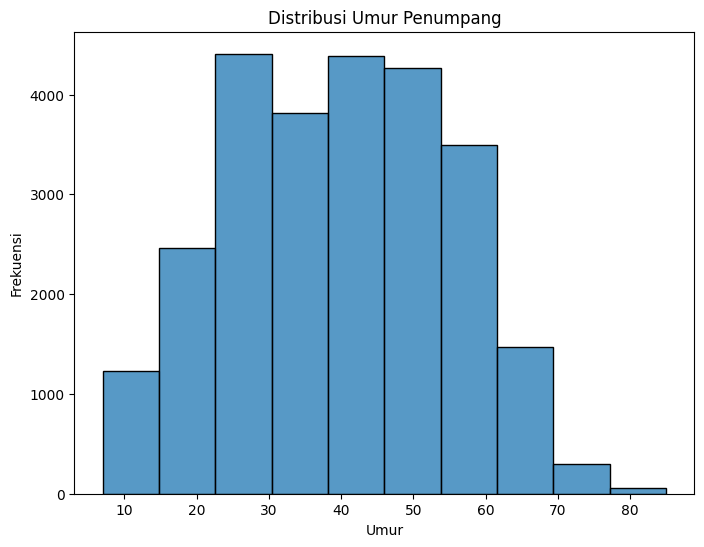

In [ ]:
# Histogram untuk fitur 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.title('Distribusi Umur Penumpang')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

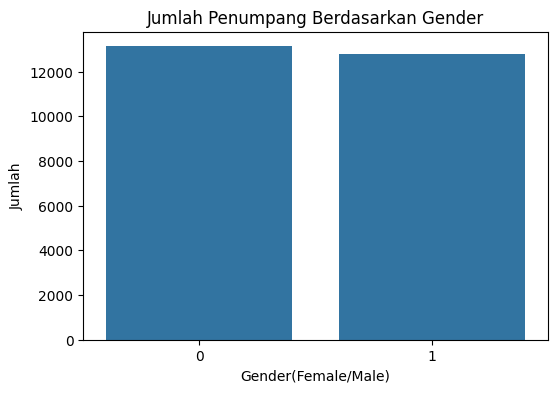

In [ ]:
# Bar chart untuk fitur 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Jumlah Penumpang Berdasarkan Gender')
plt.xlabel('Gender(Female/Male)')
plt.ylabel('Jumlah')
plt.show()

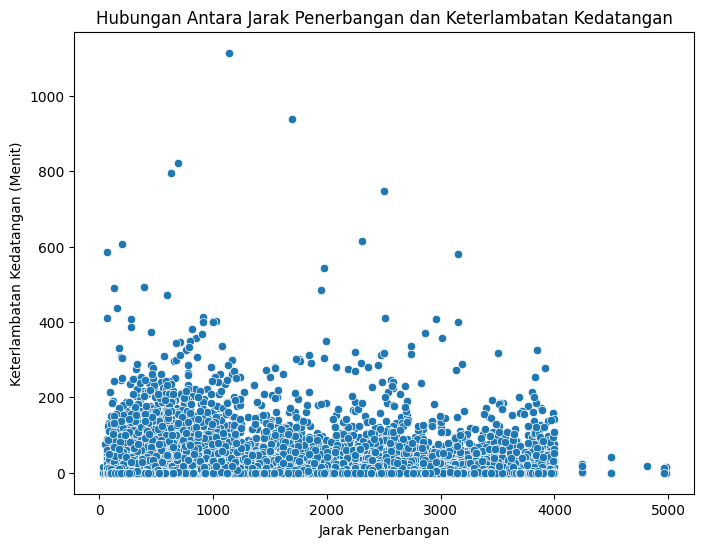

In [ ]:
# Scatter plot untuk fitur 'Flight Distance' dan 'Arrival Delay in Minutes'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Flight Distance', y='Arrival Delay in Minutes', data=df)
plt.title('Hubungan Antara Jarak Penerbangan dan Keterlambatan Kedatangan')
plt.xlabel('Jarak Penerbangan')
plt.ylabel('Keterlambatan Kedatangan (Menit)')
plt.show()

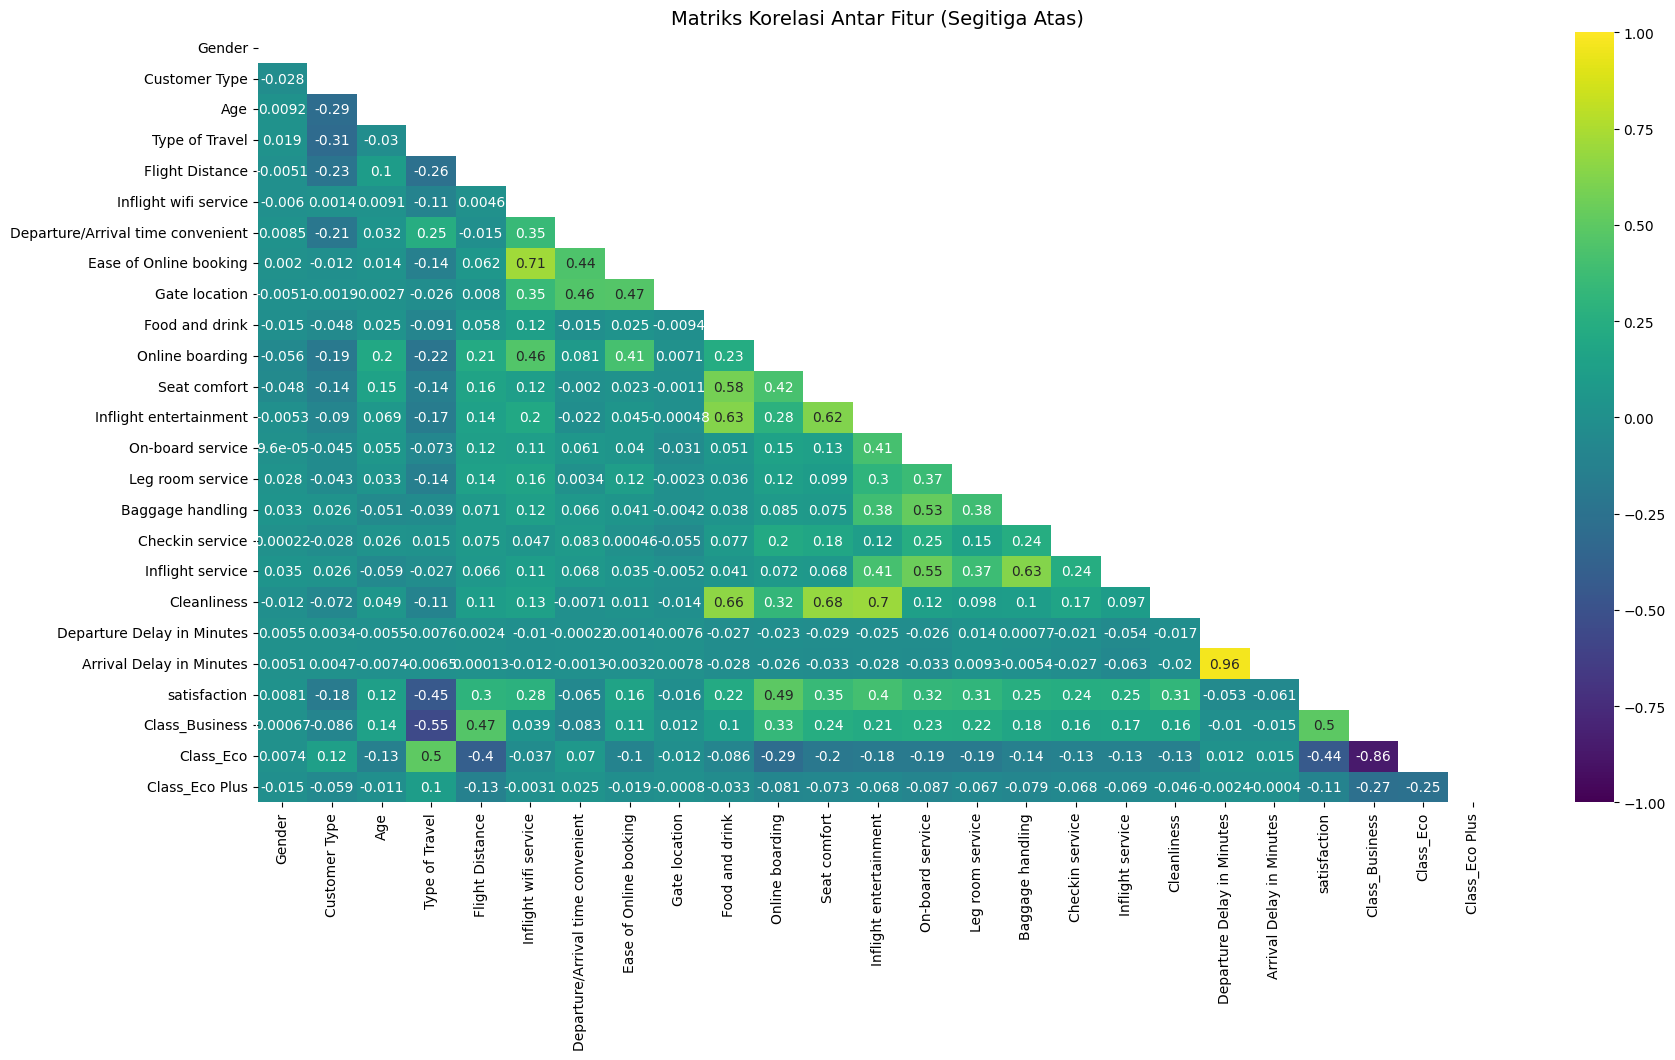

In [ ]:
import numpy as np

# Menghitung matriks korelasi
corr_matrix = df.corr()

# Mengambil bagian atas dari matriks korelasi (segitiga atas)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Membuat heatmap dengan mask
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', mask=mask, vmin=-1, vmax=1)
plt.title('Matriks Korelasi Antar Fitur (Segitiga Atas)', fontsize=14)
plt.show()

# Seleksi Fitur

In [ ]:
# Menggunakan Random Forest untuk Seleksi Fitur
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Latih model Random Forest untuk mendapatkan feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Mendapatkan skor feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

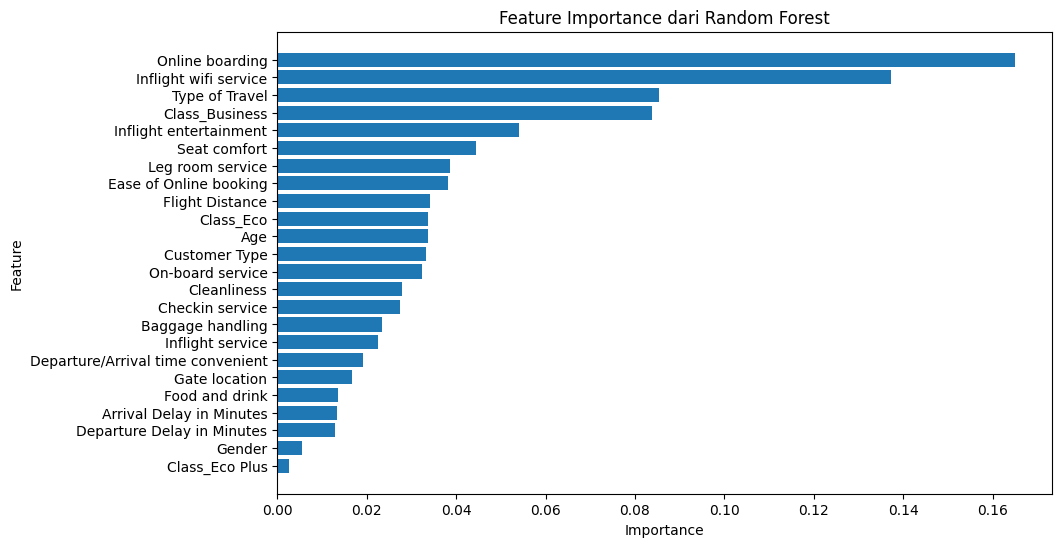

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance dari Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Memilih fitur penting (threshold dapat disesuaikan, misal > 0.01)
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Tampilkan fitur yg dipilih
print("Fitur yang dipilih:")
print(selected_features)

Fitur yang dipilih:
10                      Online boarding
5                 Inflight wifi service
3                        Type of Travel
21                       Class_Business
12               Inflight entertainment
11                         Seat comfort
14                     Leg room service
7                Ease of Online booking
4                       Flight Distance
22                            Class_Eco
2                                   Age
1                         Customer Type
13                     On-board service
18                          Cleanliness
16                      Checkin service
15                     Baggage handling
17                     Inflight service
6     Departure/Arrival time convenient
8                         Gate location
9                        Food and drink
20             Arrival Delay in Minutes
19           Departure Delay in Minutes
Name: Feature, dtype: object


# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import joblib

param_grid = {
       'n_estimators': [100, 200, 300],
       'max_depth': [None, 10, 20, 30],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]
   }

In [ ]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                                      param_distributions=param_grid,
                                      scoring='f1',
                                      cv=5,
                                      n_iter=10) # Tentukan jumlah iterasi
random_search.fit(X_train_selected, y_train)

# Dapatkan model terbaik:
best_rf_model = random_search.best_estimator_

In [ ]:
# Simpan model ke file
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Model berhasil disimpan ke 'random_forest_model.pkl'")

Model berhasil disimpan ke 'random_forest_model.pkl'


In [ ]:
# Simpan hasil prediksi ke CSV
y_pred_train = best_rf_model.predict(X_train_selected)
y_pred_test = best_rf_model.predict(X_test_selected)

predictions_df = pd.DataFrame({'aktual': y_test, 'prediksi': y_pred_test})
predictions_df.to_csv('model_predictions.csv', index=False)
print("Prediksi model disimpan ke 'model_predictions.csv'")

Prediksi model disimpan ke 'model_predictions.csv'


# Evaluasi Model

In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Evaluasi pada data uji
y_pred_test = best_rf_model.predict(X_test_selected)  # Menggunakan best_rf_model

f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [ ]:
# Menampilkan metrik evaluasi
print("F1-Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

F1-Score: 0.9475555555555556
Accuracy: 0.9544313574049044
Confusion Matrix:
 [[2811   79]
 [ 157 2132]]


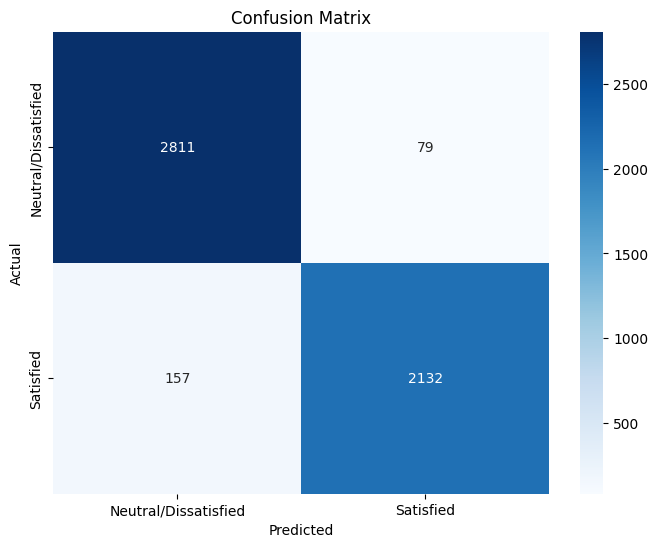

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Neutral/Dissatisfied", "Satisfied"],
            yticklabels=["Neutral/Dissatisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Upaya Perbaikan

Tuning Hyperparameter lanjutan

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score

def objective(params):
    # Definisikan model Random Forest dengan hyperparameter dari params
    model = RandomForestClassifier(**params, random_state=42, class_weight='balanced')
    # Latih dan evaluasi model (misalnya, menggunakan cross-validation)
    score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1').mean()
    # Kembalikan skor (f1) dan status
    return {'loss': -score, 'status': STATUS_OK}

# Definisikan ruang pencarian hyperparameter
space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 50)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 30, 5)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 4, 1))
}

# Jalankan Bayesian Optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Dapatkan hyperparameter terbaik
best_params = space_eval(space, best)

# Latih model dengan parameter terbaik
best_rf_model_tuned = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
best_rf_model_tuned.fit(X_train_selected, y_train)

# Evaluasi model yang telah di-tuning
y_pred_test_tuned = best_rf_model_tuned.predict(X_test_selected)
f1_tuned = f1_score(y_test, y_pred_test_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)
print("F1-Score (Tuned):", f1_tuned)
print("Accuracy (Tuned):", accuracy_tuned)

100%|██████████| 50/50 [24:27<00:00, 29.34s/trial, best loss: -0.9475111564510105]
F1-Score (Tuned): 0.9470404984423676
Accuracy (Tuned): 0.9540451824676579


Analisis Eror

In [ ]:
# Dapatkan data False Positive
fp_indices = (y_test != y_pred_test) & (y_pred_test == 1)  # Menggunakan tanda kurung dan operator &
fp_data = X_test_selected[fp_indices]

# Analisis karakteristik data False Positive
fp_data.describe()

,Online boarding,Inflight wifi service,Type of Travel,Inflight entertainment,Seat comfort,Leg room service,Ease of Online booking,Flight Distance,Age,Customer Type,...,Cleanliness,Checkin service,Baggage handling,Inflight service,Departure/Arrival time convenient,Gate location,Food and drink,Arrival Delay in Minutes,Departure Delay in Minutes,Distance_Delay_Interaction
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,3.835443,3.924051,0.037975,3.569620,3.354430,3.443038,3.658228,827.379747,40.746835,0.405063,...,3.329114,3.151899,3.645570,3.835443,3.417722,3.240506,3.341772,9.506329,10.658228,12055.860759
std,0.629008,0.549409,0.192356,1.117272,1.098227,1.184806,1.119593,860.312649,14.178775,0.494041,...,1.162684,1.261751,1.166168,1.067352,1.524228,1.425187,1.175455,22.258316,25.194569,55996.729099
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,73.000000,16.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,0.000000,3.000000,3.000000,2.000000,3.000000,264.500000,28.500000,0.000000,...,3.000000,2.000000,3.000000,3.500000,2.500000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,546.000000,39.000000,0.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,959.500000,52.000000,1.000000,...,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,7.500000,10.500000,4350.000000
max,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,3998.000000,80.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,122.000000,140.000000,483758.000000
